In [1]:
# !pip install pandas
import pandas as pd
import os

In [2]:
file_dir = "./rosdata/MPC/Init_angle_1.5707963267948966_seed_1_Nactor_4"
fn = os.listdir(file_dir)
fn = sorted(fn, key=lambda x: int(x.split(".")[0]))[-1]

file_path = os.path.join(
    file_dir,
    fn
)
with open(file_path) as f:
    data = f.read().splitlines()[20:]

data
fn

'1720703185.873048__3wrobotNI__MPC__2024-07-11__15h06m25s__run01.csv'

In [3]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
df

,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]
0,129.811,-1.002389,3.000207,-1.573025,94.503525,28.351058,0.220000,-1.941696
1,129.951,-1.002389,3.000207,-1.573025,94.503525,56.702115,0.220000,-1.941696
2,129.961,-1.002389,3.000207,-1.573025,94.503525,85.053173,0.220000,-1.941696
3,129.971,-1.002389,3.000207,-1.572989,94.503433,113.404202,0.220000,-1.941696
4,129.981,-1.002389,3.000207,-1.572989,94.503433,141.755232,0.220000,-1.941696
...,...,...,...,...,...,...,...,...
1729,151.439,-0.009965,0.085500,2.446365,6.058004,26755.393711,-0.067133,-1.066987
1730,151.449,-0.009965,0.085500,2.446365,6.058004,26757.211112,-0.067133,-1.066987
1731,151.459,-0.009965,0.085500,2.446365,6.058004,26759.028513,-0.067133,-1.066987
1732,151.469,-0.008271,0.084029,2.413287,5.894701,26760.796924,-0.067133,-1.066987


<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

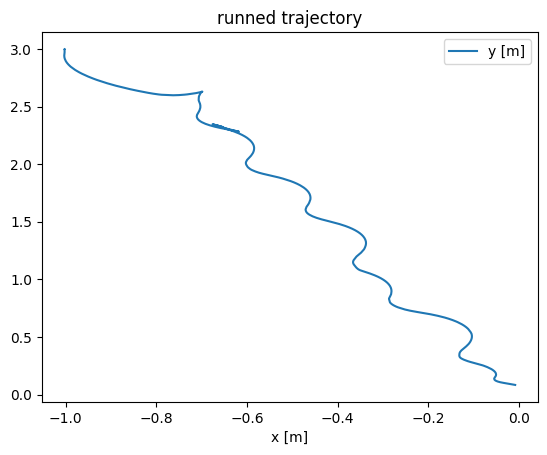

In [4]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

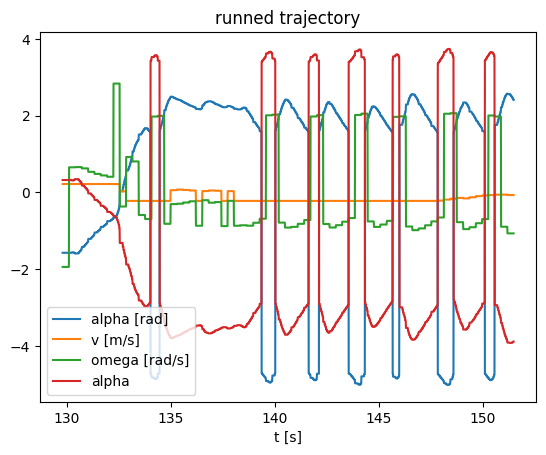

In [5]:
import numpy as np

df["alpha"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha"], title="runned trajectory")

<Axes: title={'center': 'object'}, xlabel='t [s]'>

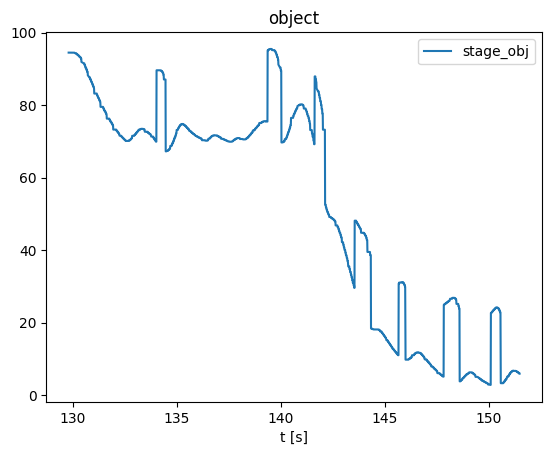

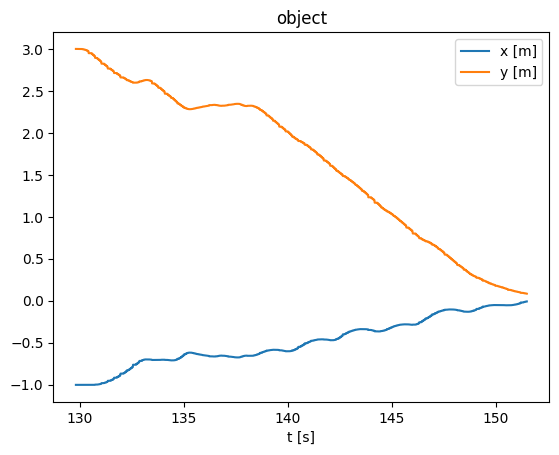

In [6]:
df
df.plot(x="t [s]", y=["stage_obj"], title="object")
df.plot(x="t [s]", y=["x [m]", "y [m]"], title="object")